In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'I_V Sweep - Unit (transfer) [251203_ALD IGZO_#1_R0C0_40_20_1(1) _ 12_8_2025 9_25_29 AM].csv'
with open(file_path,'r', encoding = 'utf-8') as f:
    lines = f.readlines() 

for i, line in enumerate(lines):
    if line.startswith('DataValue') is True:
        skiprownum = i-1
        break

df = pd.read_csv(file_path, sep = ',', skiprows = skiprownum)
df.columns = df.columns.str.strip()
df = df.iloc[:,1:]
df['ID'] = df['ID'].abs()

for i in df.columns:
    empty = df[i].isna().sum()
    print(f'{i} 컬럼의 빈칸은 {empty}개')
df.describe()
    

VG 컬럼의 빈칸은 0개
VD 컬럼의 빈칸은 0개
VS 컬럼의 빈칸은 0개
IG 컬럼의 빈칸은 0개
ID 컬럼의 빈칸은 0개
IS 컬럼의 빈칸은 0개
SS 컬럼의 빈칸은 0개
ICH 컬럼의 빈칸은 0개


,VG,VD,VS,IG,ID,IS,ICH
count,363.000000,363.000000,363.0,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02
mean,0.000000,1.500000,0.0,-8.982920e-14,3.160482e-06,-3.159410e-06,3.160482e-06
std,1.748835,1.144673,0.0,4.231941e-14,6.898611e-06,6.896477e-06,6.898611e-06
min,-3.000000,0.100000,0.0,-6.690000e-13,0.000000e+00,-3.386370e-05,-2.220000e-13
25%,-1.500000,0.100000,0.0,-1.050000e-13,2.350000e-14,-1.938445e-06,-1.185000e-13
50%,0.000000,1.500000,0.0,-8.800000e-14,3.553000e-12,-3.717000e-12,3.493000e-12
75%,1.500000,2.900000,0.0,-6.950000e-14,1.938950e-06,-1.635000e-13,1.938950e-06
max,3.000000,2.900000,0.0,2.500000e-14,3.387210e-05,-8.300000e-14,3.387210e-05


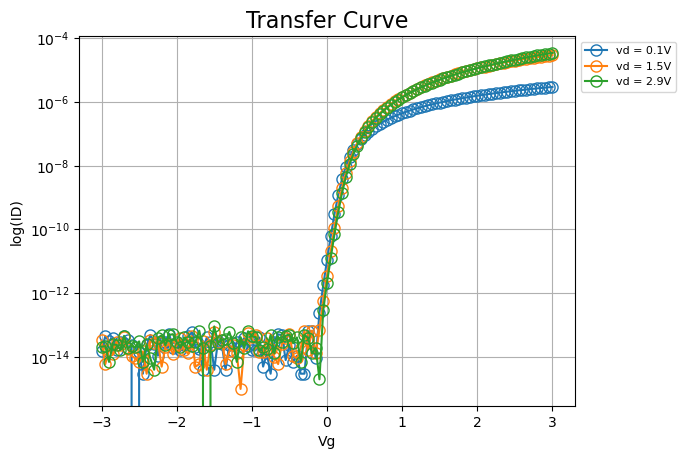

In [48]:
fig, ax = plt.subplots()
g = df.groupby('VD')

for i,group in g:
    plt.semilogy(group['VG'],group['ID'],marker = 'o', markersize = 8, markerfacecolor = 'none', label = f'vd = {i}V')

ax.set_xlabel('Vg')
ax.set_ylabel('log(ID)')
ax.grid(True)
ax.set_title('Transfer Curve', fontsize = 16)
ax.legend(bbox_to_anchor = (1,1), fontsize = 8)



In [76]:
target1 = -10            # for vth, ss
target2 = -9             # for ss

df['logi'] = np.log10(df['ID'])
for i, g in df.groupby('VD'):
    g = g.sort_values('ID')

    VG = g['VG'].to_numpy()
    LOGI = g['logi'].to_numpy()

    diff1 = LOGI - target1
    diff2 = LOGI - target2
    
    cross_point10 = np.where(diff1[1:]*diff1[:-1]<=0)
    cross_point9 = np.where(diff2[1:]*diff2[:-1]<=0)

    # target1꺼 계산
    x1, x2 = VG[cross_point10[0]], VG[cross_point10[0]+1]
    y1, y2 = LOGI[cross_point10[0]], LOGI[cross_point10[0]+1]

    # target2꺼 계산
    z1, z2 = VG[cross_point9[0]], VG[cross_point9[0]+1]
    a1, a2 = LOGI[cross_point9[0]], LOGI[cross_point9[0]+1]


    vth10 = x2 + (target1 - y2) * (x2-x1) / (y2-y1)
    vth9  = z2 + (target2 - a2) * (z2-z1) / (a2-a1)

    #ss 구하기
    ss = (vth9 - vth10)*1000
    print(f'vd ={i}에서 vth는 {vth10}[V], ss은 {ss}[mv/dec]')
    

vd =0.1에서 vth는 [0.06538497][V], ss은 [77.4082329][mv/dec]
vd =1.5에서 vth는 [0.09603633][V], ss은 [78.38538553][mv/dec]
vd =2.9에서 vth는 [0.11046893][V], ss은 [77.81905384][mv/dec]
